In [1]:
import zarr_fuse
import ipympl

In [2]:
%matplotlib widget
# Import necessary libraries
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import contextily as ctx
import pyproj
import numpy as np


# Set a seed for reproducibility
np.random.seed(42)

# Define number of sample rows
n = 50

# Create a fixed datetime value for all rows
time_val = pd.Timestamp("2020-01-01 12:00:00")

# Create the test DataFrame with columns:
# "time", "lon", "lat", and some physical quantities
df = pl.DataFrame({
    "time": [time_val] * n,
    "lon": np.random.uniform(-100, -90, n).tolist(),
    "lat": np.random.uniform(40, 50, n).tolist(),
    "temp": np.random.uniform(10, 30, n).tolist(),       # Temperature between 10 and 30
    "perc": np.random.uniform(0, 100, n).tolist(),         # Precipitation between 0 and 100
    "humidity": np.random.uniform(30, 100, n).tolist(),      # Humidity between 30 and 100
    "wind_speed": np.random.uniform(0, 20, n).tolist(),      # Wind speed between 0 and 20
    "insol": np.random.uniform(0, 10, n).tolist()            # Insolation between 0 and 10
})

print(df)

data_selector = {'lon': -90.492857, 'lat': 47.751328, 'time': df['time'][0]}


shape: (50, 8)
┌─────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬────────────┬──────────┐
│ time        ┆ lon        ┆ lat       ┆ temp      ┆ perc      ┆ humidity  ┆ wind_speed ┆ insol    │
│ ---         ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---        ┆ ---      │
│ datetime[μs ┆ f64        ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64        ┆ f64      │
│ ]           ┆            ┆           ┆           ┆           ┆           ┆            ┆          │
╞═════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪════════════╪══════════╡
│ 2020-01-01  ┆ -96.254599 ┆ 49.695846 ┆ 10.628584 ┆ 90.826589 ┆ 74.942215 ┆ 5.888978   ┆ 0.516817 │
│ 12:00:00    ┆            ┆           ┆           ┆           ┆           ┆            ┆          │
│ 2020-01-01  ┆ -90.492857 ┆ 47.751328 ┆ 22.728208 ┆ 23.956189 ┆ 35.889798 ┆ 7.701955   ┆ 5.313546 │
│ 12:00:00    ┆            ┆           ┆           ┆           ┆           ┆

In [3]:
from zarr_fuse.plotting.plot_map_view import InteractiveMapPlotter

In [4]:
from hlavo_surface import inputs
work_dir = inputs.work_dir
from zarr_fuse import open_storage, Node


root_node = Node.read_store(work_dir / "surface.zarr")
fields = {
    'yr.no': ['air_temperature', 'precipitation_amount', 'relative_humidity']
}
df_temp = root_node['yr.no'].read_df("air_temperature", date_time=slice(None))
print(df_temp)

Coord: date_time, ('date_time',)
Coord: lat_lon, ('lat_lon',)
Read DF: ['air_temperature'], dimss: {'longitude', 'latitude', 'date_time'}
shape: (8_370, 5)
┌─────────────────────┬──────────────────────┬─────────────────┬───────────┬───────────┐
│ date_time           ┆ lat_lon              ┆ air_temperature ┆ longitude ┆ latitude  │
│ ---                 ┆ ---                  ┆ ---             ┆ ---       ┆ ---       │
│ datetime[ns]        ┆ i64                  ┆ f64             ┆ f64       ┆ f64       │
╞═════════════════════╪══════════════════════╪═════════════════╪═══════════╪═══════════╡
│ 2025-04-23 13:00:00 ┆ -8991527946833379704 ┆ 17.6            ┆ 50.863542 ┆ 14.889745 │
│ 2025-04-23 13:00:00 ┆ -8271024353679682670 ┆ 16.5            ┆ 50.87     ┆ 14.96     │
│ 2025-04-23 13:00:00 ┆ -8090012848155600431 ┆ 17.6            ┆ 50.863135 ┆ 14.895767 │
│ 2025-04-23 13:00:00 ┆ -7705798931418017251 ┆ 17.6            ┆ 50.86     ┆ 14.91     │
│ 2025-04-23 13:00:00 ┆ -754676695725532294

/home/jb/workspace/zarr_fuse/zarr_fuse/zarr_storage.py:379: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr(self.store, group=rel_path)
/home/jb/workspace/zarr_fuse/zarr_fuse/zarr_storage.py:379: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly

/home/jb/workspace/zarr_fuse/zarr_fuse/zarr_storage.py:379: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr(self.store, group=rel_path)
/home/jb/workspace/zarr_fuse/zarr_fuse/zarr_storage.py:379: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly

Coord: date_time, ('date_time',)
Coord: lat_lon, ('lat_lon',)
Read DF: ['air_temperature', 'precipitation_amount', 'relative_humidity'], dimss: {'longitude', 'latitude', 'date_time'}
8370


/home/jb/workspace/zarr_fuse/zarr_fuse/plotting/plot_map_view.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_selected['x'], self.df_selected['y'] = zip(
/home/jb/workspace/zarr_fuse/zarr_fuse/plotting/plot_map_view.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_selected['x'], self.df_selected['y'] = zip(


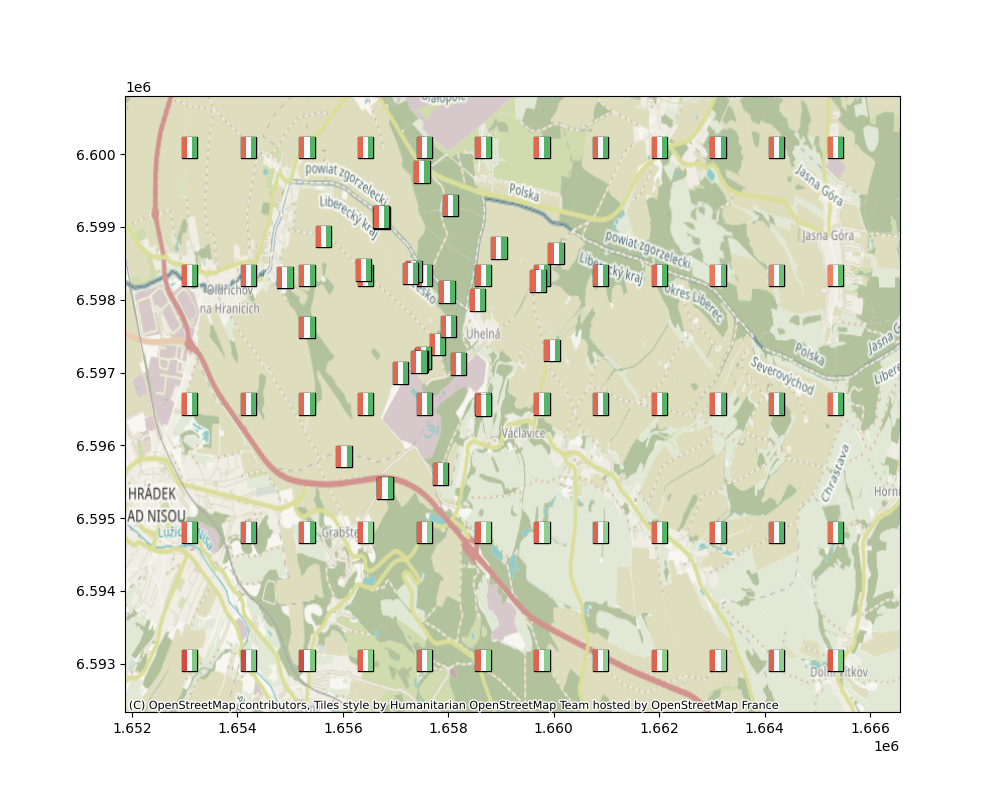

In [5]:
from zarr_fuse.plotting import InteractiveMapPlotter, build_overview
import matplotlib.pyplot as plt
# Create an instance of the InteractiveMapPlotter
node_path = 'yr.no'
node = root_node[node_path]
ds = node.dataset
overview = build_overview(root_node)
full_coords = overview[node_path].cumul_coordinates
mid_date_time = full_coords['date_time'].quantile(
            0.5,                     # 50 % quantile = median
            method="nearest"         # or "linear", "midpoint", …
).item() 
#print(mid_date_time)

mid_lat_lon = full_coords['lat_lon'][0]
point_ds = ds.sel(lat_lon=mid_lat_lon)

handlers = []
data_selector = {
    'date_time': 'time_axis',
    'longitude': 'lon_axis',
    'latitude': 'lat_axis',
    'air_temperature': plt.cm.coolwarm,  # Temperature: cool-to-warm colors
    'precipitation_amount': plt.cm.Blues,  # Precipitation: blues
    'relative_humidity': plt.cm.Greens,  # Humidity: greens
    #'wind_speed': plt.cm.Oranges,  # Wind speed: oranges
    #'insol': plt.cm.YlOrBr  # Insolation: yellow-orange-brown

    'time_point': None,
    'lon_point': None,
    'lat_point': None
}

df = node.read_df(fields[node_path], date_time=slice(None))
print(len(df))
plotter = InteractiveMapPlotter(df, data_selector, handlers)

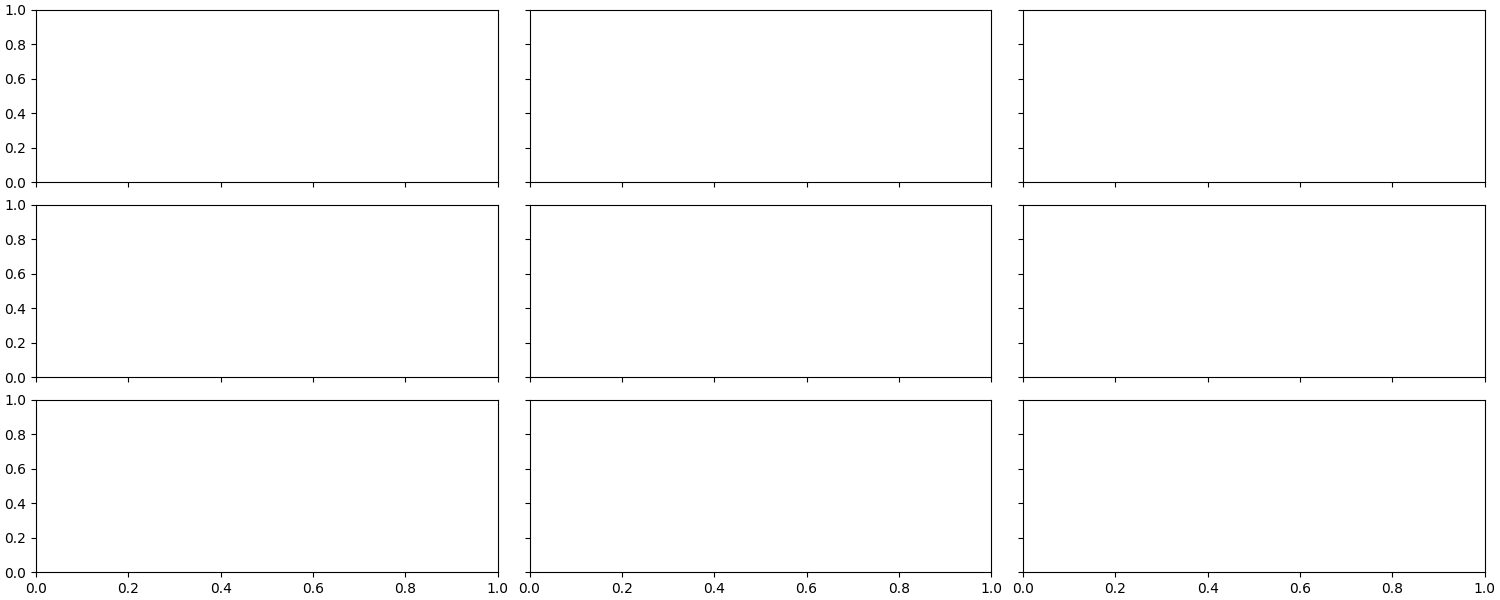

In [6]:
from zarr_fuse.plotting import MultiZoomer


MultiZoomer(df, data_selector, handlers)
